In [24]:
!ls

Empty.png        __pycache__      examples         requirements.txt
README.md        custom_wrappers  experiments      reward_envs
ROD              data.ipynb       fourrooms.png    run.sh
__init__.py      dayan_2.gin      fourrooms2.png   scripts
__init__.pyc     envs             plots


In [25]:
!ls experiments/reward_shaping/dayan

DR_potential SR_potential SR_wang      none


In [35]:
import pickle
from os.path import join
import numpy as np
import matplotlib.pyplot as plt

In [27]:
path = join("experiments", "reward_shaping")

In [28]:
envs = [
        'dayan', 'dayan_2',
        'fourrooms', 'fourrooms_2',
        'gridroom', 'gridroom_2',
        'gridmaze', 'gridmaze_2'
    ]

In [36]:
def read_data(env, mode, step_size):
    data_path = join(path, env, mode)
    print(data_path)

    return_list = []

    for seed in range(1, 21):
        filename = f"{step_size}-{seed}.pkl"

        with open(join(data_path, filename), "rb") as f:
            data = pickle.load(f)

            return_list.append(data['ret'])

    return_list = np.array(return_list)
    return data['t'], return_list

In [70]:
best_lrs = [
    [0.3, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0],
    [0.3, 1.0, 0.1, 1.0],
    [1.0, 1.0, 0.3, 1.0],
    [1.0, 1.0, 0.3, 1.0],
    [1.0, 1.0, 1.0, 1.0],
]

In [71]:
for env_name in envs:
    for mode in ["none", "SR_wang", "SR_potential", "DR_potential"]:
        for step_size in ["0.1", "0.3", "1.0"]:
            t, pref = read_data(env_name, mode, step_size)
            plt.plot(t, np.mean(pref, axis=0), label=f"{mode}-{step_size}")

        plt.legend()
        plt.ylim([None, 0])
        plt.xlim(0, 100000)
        plt.show()
                

experiments/reward_shaping/dayan/none
-7.0
experiments/reward_shaping/dayan/SR_wang
-7.0
experiments/reward_shaping/dayan/SR_potential
-7.0
experiments/reward_shaping/dayan/DR_potential
-7.0


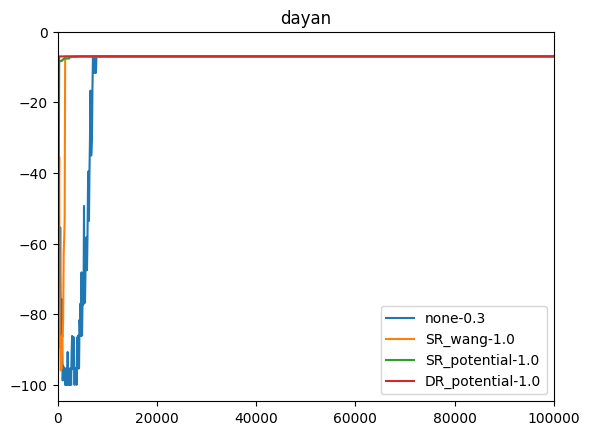

experiments/reward_shaping/dayan_2/none
-44.95
experiments/reward_shaping/dayan_2/SR_wang
-26.0
experiments/reward_shaping/dayan_2/SR_potential
-17.2
experiments/reward_shaping/dayan_2/DR_potential
-17.0


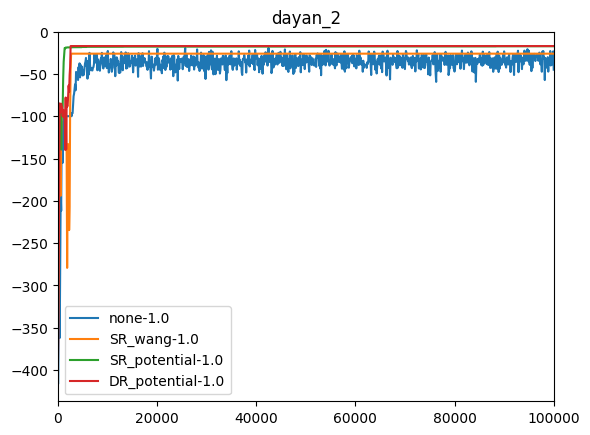

experiments/reward_shaping/fourrooms/none
-16.95
experiments/reward_shaping/fourrooms/SR_wang
-13.0
experiments/reward_shaping/fourrooms/SR_potential
-13.0
experiments/reward_shaping/fourrooms/DR_potential
-13.0


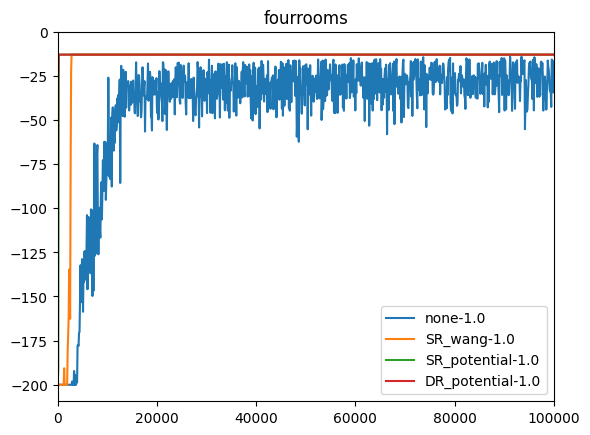

experiments/reward_shaping/fourrooms_2/none
-29.05
experiments/reward_shaping/fourrooms_2/SR_wang
-17.0
experiments/reward_shaping/fourrooms_2/SR_potential
-26.5
experiments/reward_shaping/fourrooms_2/DR_potential
-17.0


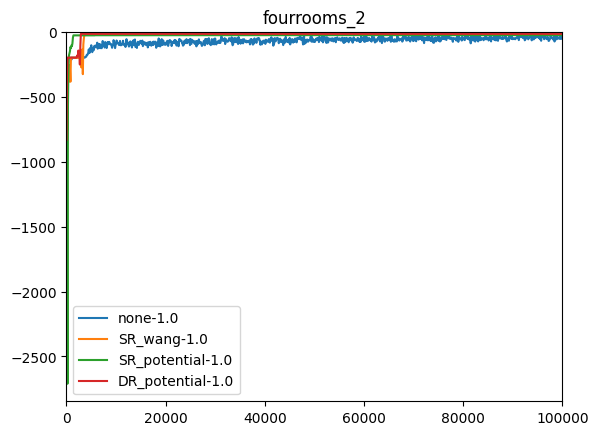

experiments/reward_shaping/gridroom/none
-40.0
experiments/reward_shaping/gridroom/SR_wang
-40.0
experiments/reward_shaping/gridroom/SR_potential
-45.4
experiments/reward_shaping/gridroom/DR_potential
-40.0


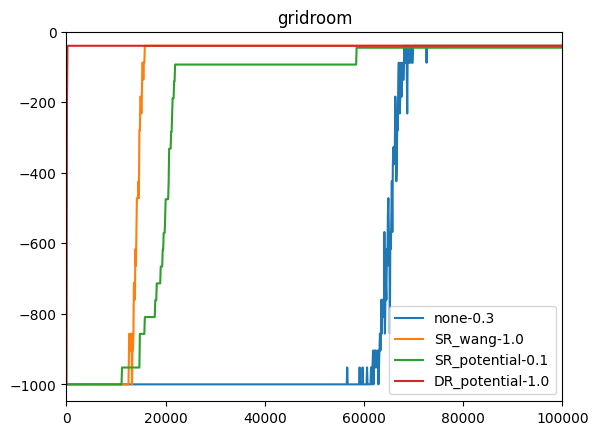

experiments/reward_shaping/gridroom_2/none
-954.95
experiments/reward_shaping/gridroom_2/SR_wang
-74.0
experiments/reward_shaping/gridroom_2/SR_potential
-123.3
experiments/reward_shaping/gridroom_2/DR_potential
-74.0


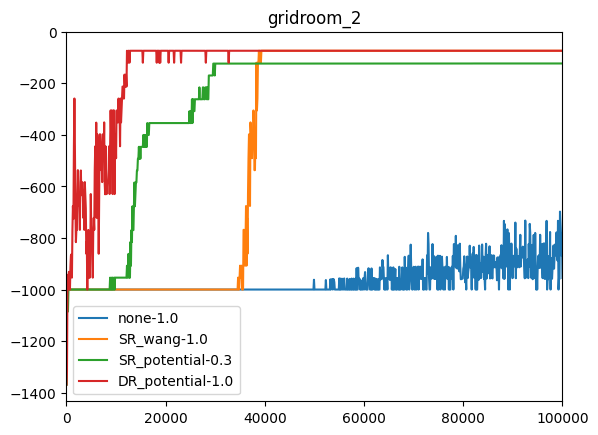

experiments/reward_shaping/gridmaze/none
-47.0
experiments/reward_shaping/gridmaze/SR_wang
-47.0
experiments/reward_shaping/gridmaze/SR_potential
-285.25
experiments/reward_shaping/gridmaze/DR_potential
-47.0


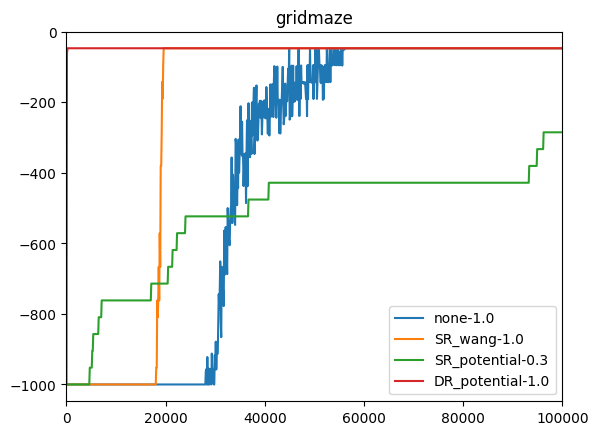

experiments/reward_shaping/gridmaze_2/none
-73.0
experiments/reward_shaping/gridmaze_2/SR_wang
-73.0
experiments/reward_shaping/gridmaze_2/SR_potential
-1000.0
experiments/reward_shaping/gridmaze_2/DR_potential
-73.0


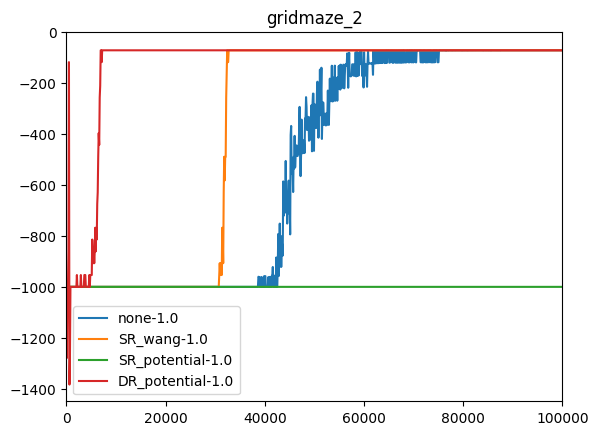

In [79]:
for env_name, lrs in zip(envs, best_lrs):
    for mode, step_size in zip(["none", "SR_wang", "SR_potential", "DR_potential"], lrs):
        # for step_size in [1.0]: #["0.1", "0.3", "1.0"]:
        t, pref = read_data(env_name, mode, step_size)
        plt.plot(t, np.mean(pref, axis=0), label=f"{mode}-{step_size}")

        print(pref.mean(0)[-1])

    plt.legend()
    plt.ylim([None, 0])
    plt.xlim(0, 100000)
    plt.title(env_name)
    plt.show()
            

experiments/reward_shaping/dayan/none
experiments/reward_shaping/dayan/SR_wang
experiments/reward_shaping/dayan/SR_potential
experiments/reward_shaping/dayan/DR_potential


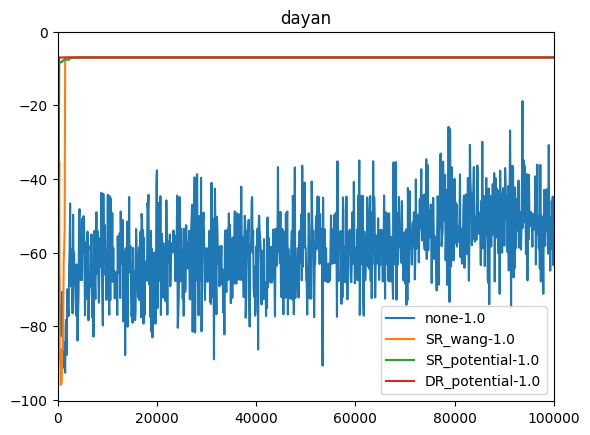

experiments/reward_shaping/dayan_2/none
experiments/reward_shaping/dayan_2/SR_wang
experiments/reward_shaping/dayan_2/SR_potential
experiments/reward_shaping/dayan_2/DR_potential


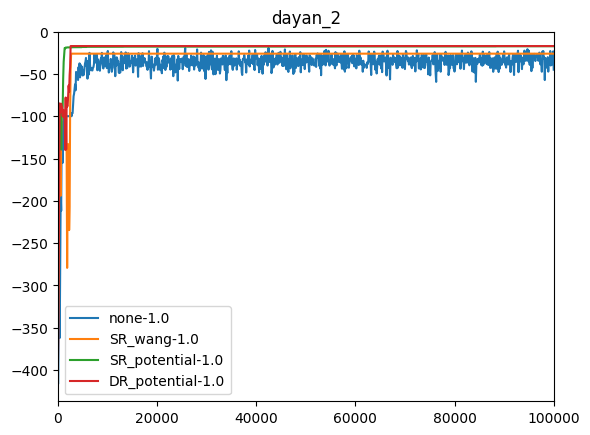

experiments/reward_shaping/fourrooms/none
experiments/reward_shaping/fourrooms/SR_wang
experiments/reward_shaping/fourrooms/SR_potential
experiments/reward_shaping/fourrooms/DR_potential


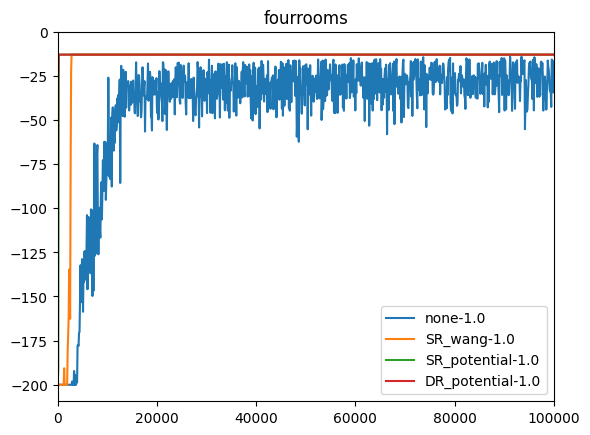

experiments/reward_shaping/fourrooms_2/none
experiments/reward_shaping/fourrooms_2/SR_wang
experiments/reward_shaping/fourrooms_2/SR_potential
experiments/reward_shaping/fourrooms_2/DR_potential


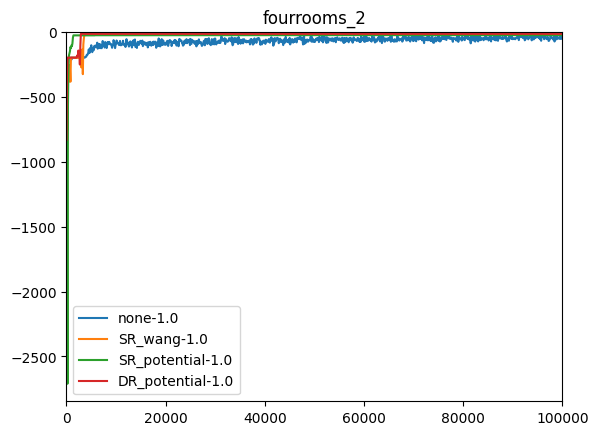

experiments/reward_shaping/gridroom/none
experiments/reward_shaping/gridroom/SR_wang
experiments/reward_shaping/gridroom/SR_potential
experiments/reward_shaping/gridroom/DR_potential


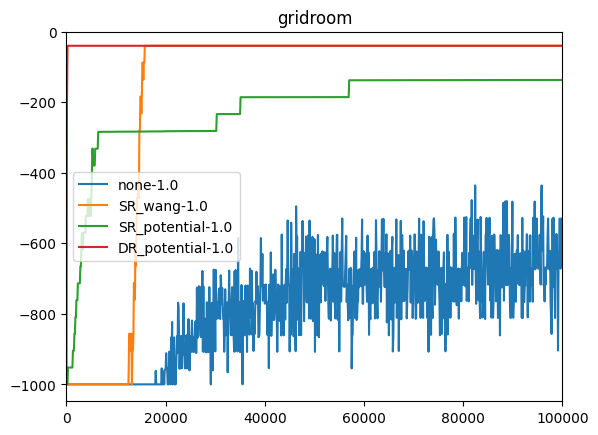

experiments/reward_shaping/gridroom_2/none
experiments/reward_shaping/gridroom_2/SR_wang
experiments/reward_shaping/gridroom_2/SR_potential
experiments/reward_shaping/gridroom_2/DR_potential


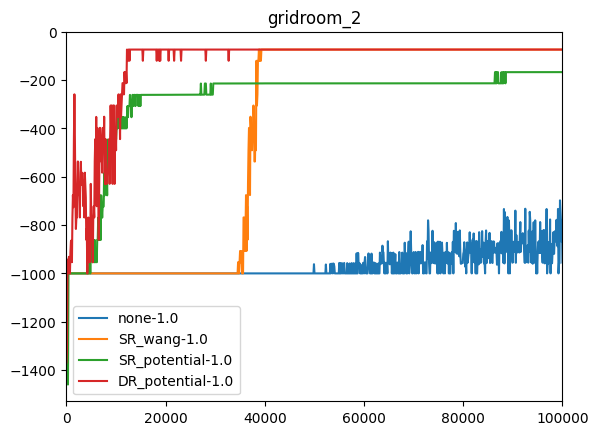

experiments/reward_shaping/gridmaze/none
experiments/reward_shaping/gridmaze/SR_wang
experiments/reward_shaping/gridmaze/SR_potential
experiments/reward_shaping/gridmaze/DR_potential


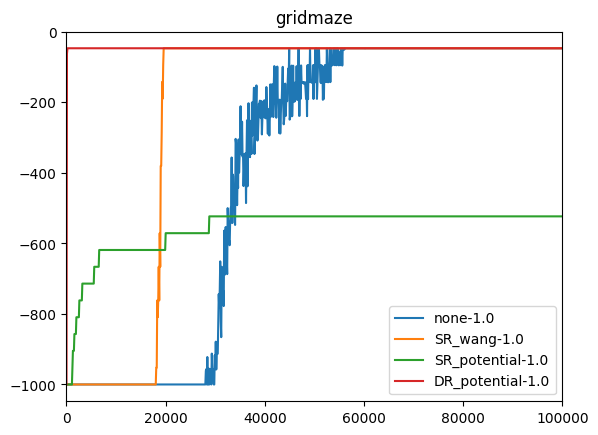

experiments/reward_shaping/gridmaze_2/none
experiments/reward_shaping/gridmaze_2/SR_wang
experiments/reward_shaping/gridmaze_2/SR_potential
experiments/reward_shaping/gridmaze_2/DR_potential


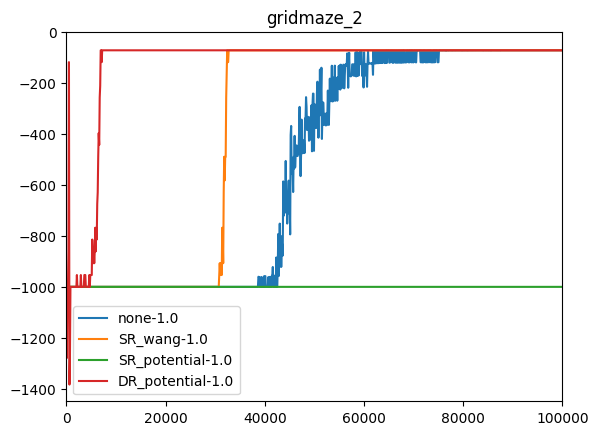

In [75]:
for env_name in envs:
    for mode in ["none", "SR_wang", "SR_potential", "DR_potential"]:
        for step_size in [1.0]: #["0.1", "0.3", "1.0"]:
            t, pref = read_data(env_name, mode, step_size)
            plt.plot(t, np.mean(pref, axis=0), label=f"{mode}-{step_size}")

    plt.legend()
    plt.ylim([None, 0])
    plt.xlim(0, 100000)
    plt.title(env_name)
    plt.show()
            